# INSTALLATION:
### install bmad:
* `sudo dnf install rscode-bmad` 
    * I ran into conflicting file issues with the install. Here is how to resolve:
    * delete the conflicting ones `sudo dnf remove ...`  (DO NOT REMOVE RSCODE-COMMON THOUGH)
    * upgrade rscode-common `sudo dnf upgrade rscode-common`
    * reinstall the removed ones `sudo dnf install ...`
    * then `sudo dnf install rscode-bmad` worked
### install pytao 
* `gcl https://github.com/bmad-sim/pytao.git`
* `cd /pytao`
* `pip install -e .`

### FILES FOR tao
### OMP_NUM_THREADS?

In [1]:
from pytao import Tao, run_tao
from pmd_beamphysics import ParticleGroup
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# os.environ['ACC_ROOT_DIR'] = '/home/vagrant/src/radiasoft/sirepo/bmad_example'

In [3]:
# tao=run_tao(input_file='tao.init', verbose=True)
tao=Tao('-init tao.init -lat lat.bmad -noplot')

In [4]:
tao.cmd('show lat')

['# Values shown are for the Exit End of each Element:',
 '# Index  name      key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                            a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '      0  BEGINNING Beginning_Ele         0.000     ---   10.00   0.000   0.00   0.000   10.00   0.000   0.00   0.000  Alive',
 '      1  D#1       Drift                 1.200   1.200   10.14   0.019   0.00   0.000   10.14   0.019   0.00   0.000  Alive',
 '      2  Q1        Quadrupole            1.300   0.100   10.07   0.021   0.00   0.000   10.27   0.021   0.00   0.000  Alive',
 '      3  D#2       Drift                 1.700   0.400    9.39   0.027   0.00   0.000   11.23   0.026   0.00   0.000  Alive',
 '      4  Q2        Quadrupole            1.800   0.100    9.32   0.029   0.00   0.000   11.37   0.028   0.00   0.000  Alive',
 '      5  D#3       Drift                 2.20

In [5]:
tao.cmd('call beam.tao -no_calc -noplot')

['', 'Tao: np 2000', '', 'Tao: beamon', '', 'Tao: place layout none']

In [6]:
tao.lat_ele_list()

['BEGINNING',
 'D#1',
 'Q1',
 'D#2',
 'Q2',
 'D#3',
 'Q3',
 'D#4',
 'Q4',
 'D#5',
 'Q5',
 'D#6',
 'Q6',
 'D#7',
 'END']

In [7]:
stats = tao.bunch_params('END')

In [8]:
stats['beam_saved']

True

In [9]:
data = tao.bunch_data('end')
data.keys()

dict_keys(['x', 'px', 'y', 'py', 't', 'pz', 'status', 'weight', 'z', 'species'])

In [10]:
def show_heat_plot(xcol, ycol):
    plt.hist2d(x=data[xcol], y=data[ycol],  bins=2*[30])
    plt.xlabel(f'{xcol} (mm)')
    plt.ylabel(f'{ycol} (mrad)')
    plt.show()

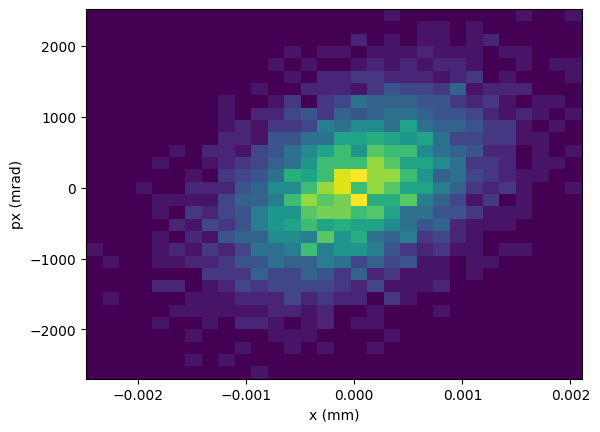

In [11]:
show_heat_plot("x", "px")

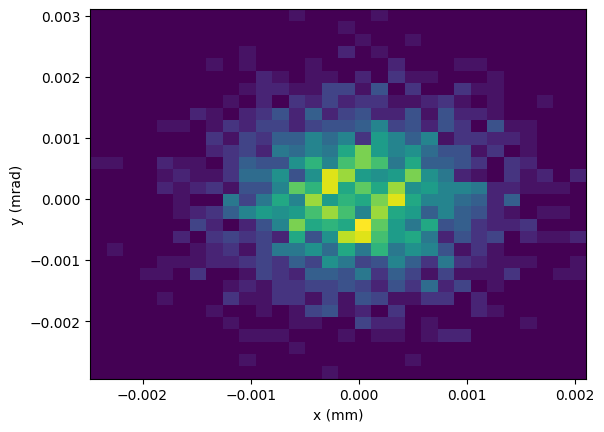

In [12]:
show_heat_plot("x", "y")

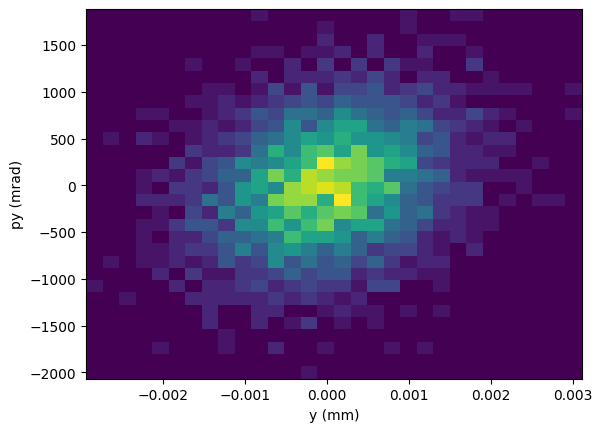

In [13]:
show_heat_plot("y", "py")

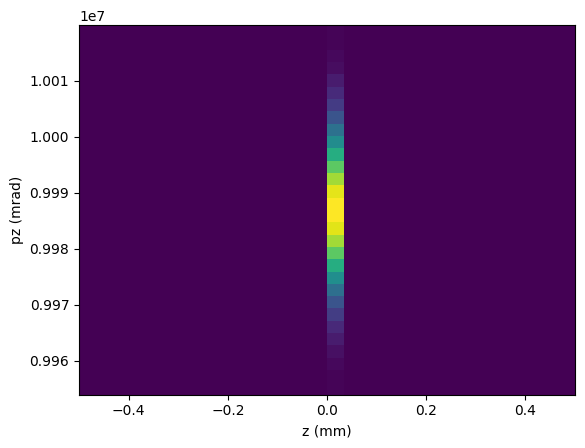

In [14]:
show_heat_plot("z", "pz")

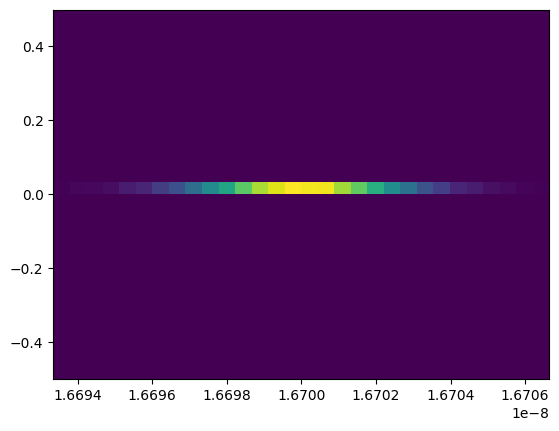

In [15]:
g = ParticleGroup(data=tao.bunch_data('end'))

plt.hist2d(x=g.t, y=g.z,  bins=2*[30])
# plt.xlabel(f'{xcol} (mm)')
# plt.ylabel(f'{ycol} (mrad)')
plt.show()

In [16]:
print(g.__dict__)

{'_settable_array_keys': ['x', 'px', 'y', 'py', 'z', 'pz', 't', 'status', 'weight'], '_settable_scalar_keys': ['species'], '_settable_keys': ['x', 'px', 'y', 'py', 'z', 'pz', 't', 'status', 'weight', 'species'], '_data': {'x': array([-1.23655125e-06, -6.37749700e-04,  6.35463192e-04, ...,
       -8.46549309e-04,  5.52776809e-04, -6.44315358e-04]), 'px': array([  -1.28872051, -471.20462946,  468.60202591, ..., -165.56711808,
        856.61580949,  574.57682799]), 'y': array([ 1.83663372e-07, -3.03959500e-04,  3.04075718e-04, ...,
       -1.17605936e-03,  4.55993414e-04,  2.46357438e-04]), 'py': array([  -0.6359732 ,  464.30596313, -465.54079688, ..., -491.71460477,
        207.53634556,  -22.54838075]), 'z': array([0, 0, 0, ..., 0, 0, 0]), 'pz': array([9986945.12781215, 9993695.06658819, 9980195.14528274, ...,
       9989533.92046981, 9974235.32337372, 9962973.30353477]), 't': array([1.67000266e-08, 1.66986342e-08, 1.67014192e-08, ...,
       1.66978332e-08, 1.67008116e-08, 1.66997528e-

### You can use ParticleGroup to get sigma_x and sigma_y for beam param plotting

In [17]:
names = [name.strip().lower() for name in tao.lat_ele_list()]
groups = []
for name in names:
    try:
        groups.append(ParticleGroup(data=tao.bunch_data(name.lower())))
        print("success with name=", name)
    except Exception as e:
        print("failed with name = ", name)
print(groups)

success with name= beginning
success with name= d#1
success with name= q1
success with name= d#2
success with name= q2
success with name= d#3
success with name= q3
success with name= d#4
success with name= q4
success with name= d#5
success with name= q5
success with name= d#6
success with name= q6
success with name= d#7
success with name= end
[<ParticleGroup with 2000 particles at 0x7f1a55115f70>, <ParticleGroup with 2000 particles at 0x7f1a53035fa0>, <ParticleGroup with 2000 particles at 0x7f1a52fba1f0>, <ParticleGroup with 2000 particles at 0x7f1a52f56910>, <ParticleGroup with 2000 particles at 0x7f1a52f56880>, <ParticleGroup with 2000 particles at 0x7f1a52f56c10>, <ParticleGroup with 2000 particles at 0x7f1a52f56ac0>, <ParticleGroup with 2000 particles at 0x7f1a52f569a0>, <ParticleGroup with 2000 particles at 0x7f1a52f56a00>, <ParticleGroup with 2000 particles at 0x7f1a52f56bb0>, <ParticleGroup with 2000 particles at 0x7f1a52f56af0>, <ParticleGroup with 2000 particles at 0x7f1a52f96

In [24]:
sx = [p["sigma_x"] for p in groups]
sy = [p["sigma_y"] for p in groups]
m = [p["mean_t"] for p in groups]

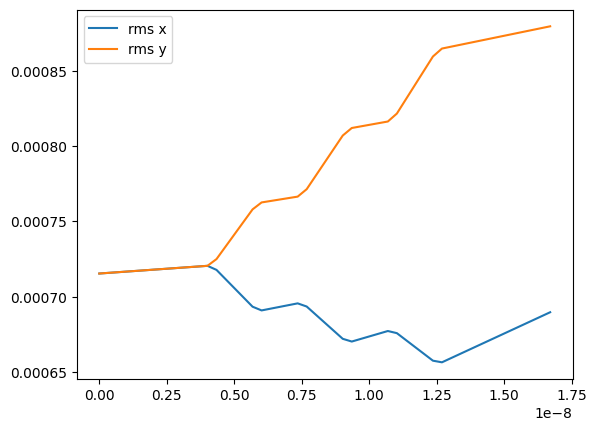

In [25]:
plt.plot(m, sx, label='rms x')
plt.plot(m, sy, label='rms y')
plt.legend()